In [1]:

from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


# Exploratory Precipitation Analysis

In [8]:
# Find the most recent date in the data set.
session = Session(engine)
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

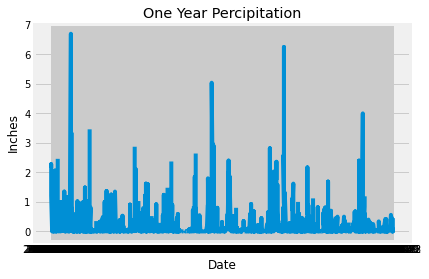

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.


# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(session.query(Measurement.date, Measurement.prcp).\
             filter(Measurement.date > '2016-08-23').all())


# Sort the dataframe by date
df = df.sort_values(0)
df = df.set_index(0)


# Use Pandas Plotting with Matplotlib to plot the data

plt.plot(df)
plt.title("One Year Percipitation")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.show()

In [10]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df.describe()

,1
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [11]:
# Design a query to calculate the total number stations in the dataset
session.query(Station.station).count()

9

In [12]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [13]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
session.query(func.min(Measurement.tobs),\
               func.max(Measurement.tobs),\
                (func.sum(Measurement.tobs)/func.count(Measurement.tobs))).\
    filter(Measurement.station == 'USC00519281').\
    all()

[(54.0, 85.0, 71.66378066378067)]

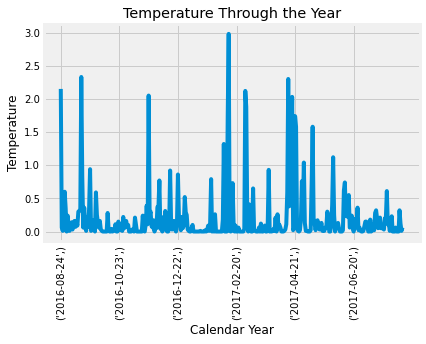

In [40]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temps = session.query(Measurement.prcp).\
    filter(Measurement.date > '2016-08-23', Measurement.station == 'USC00519281').\
    all()

dates = session.query(Measurement.date).\
    filter(Measurement.date > '2016-08-23', Measurement.station == 'USC00519281').\
    all()

x = np.arange(len(dates))
y = temps

plt.plot(x, y)
plt.title("Temperature Through the Year")
plt.xlabel("Calendar Year")
plt.ylabel("Temperature")



plt.xticks(x[::60], dates[::60], rotation='vertical')
plt.show()


# Close session

In [15]:
# Close Session
session.close()